## Metro Traffic volume dataset  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/SaeedShaikh786/demo_pipeline/main/notebook/data/Metro_Interstate_Traffic_Volume.csv")

### tasks to do
- drop rain
- drop snow
- drop holiday
- create weekday column
- check the categories weather_main and weather_description
- make hours in parts categorical

#

```
holiday                Categorical    US National holidays plus regional holiday, Minnesota State Fair
temp                   Numeric        Average temp in kelvin
rain_1h                Numeric        Amount in mm of rain that occurred in the hour
snow_1h                Numeric        Amount in mm of snow that occurred in the hour
clouds_all             Numeric        Percentage of cloud cover
weather_main           Categorical    Short textual description of the current weather
weather_description    Categorical    Longer textual description of the current weather
date_time              DateTime       Hour of the data collected in local CST time
traffic_volume         Numeric        Hourly I-94 ATR 301 reported westbound traffic volume
```

In [3]:
data.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00,4918
5,None,291.72,0.0,0.0,1,Clear,sky is clear,02-10-2012 14:00,5181
6,None,293.17,0.0,0.0,1,Clear,sky is clear,02-10-2012 15:00,5584
7,None,293.86,0.0,0.0,1,Clear,sky is clear,02-10-2012 16:00,6015
8,None,294.14,0.0,0.0,20,Clouds,few clouds,02-10-2012 17:00,5791
9,None,293.10,0.0,0.0,20,Clouds,few clouds,02-10-2012 18:00,4770


### rain
### snow
### weather
### hour

In [4]:
data.holiday.value_counts()

None                         48143
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64

In [5]:
(data.holiday!="None").sum()

61

In [6]:
data.temp.describe()

count    48204.000000
mean       281.205870
std         13.338232
min          0.000000
25%        272.160000
50%        282.450000
75%        291.806000
max        310.070000
Name: temp, dtype: float64

In [7]:
hf=data[data.holiday!="None"]["traffic_volume"]

In [8]:
hf.values



array([ 455, 1000,  919,  803, 1439,  556,  863, 1060,  661, 1041,  615,
        514,  929,  712, 1395,  480,  583,  967,  959,  605,  973,  494,
        559,  833,  833,  894, 1513, 1513,  785, 1082, 1115,  655, 1064,
       1064,  484,  572,  763,  732,  732,  798,  698,  698,  629, 1538,
       1225,  657, 1026,  549,  812, 1324, 1092, 1478,  600,  600,  600,
        623, 1088, 1021,  596,  962,  962])

In [9]:
data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [10]:
data.date_time

0        02-10-2012 09:00
1        02-10-2012 10:00
2        02-10-2012 11:00
3        02-10-2012 12:00
4        02-10-2012 13:00
               ...       
48199    30-09-2018 19:00
48200    30-09-2018 20:00
48201    30-09-2018 21:00
48202    30-09-2018 22:00
48203    30-09-2018 23:00
Name: date_time, Length: 48204, dtype: object

In [11]:
# importing pandas as pd

# change in date time format
date_sr = pd.to_datetime(pd.Series("2012-09-02"))
change_format = date_sr.dt.strftime('%d-%m-%Y')

# Print the formatted date
print(change_format)
date_sr

0    02-09-2012
dtype: object


0   2012-09-02
dtype: datetime64[ns]

In [12]:
l=list(data.weather_description.unique())

In [13]:
data[data.weather_description.str.contains("clouds")]


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00,4918
...,...,...,...,...,...,...,...,...,...
48197,None,284.79,0.0,0.0,75,Clouds,broken clouds,30-09-2018 17:00,4132
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,30-09-2018 19:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 20:00,2781
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 22:00,1450


In [ ]:
#data["date_time_n"]=pd.to_datetime(data["date_time"])

In [ ]:
#data.drop("date_time",axis=1,inplace=True)

In [14]:
data["date_time"]=pd.to_datetime(data["date_time"])


In [15]:
data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-02-10 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-02-10 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-02-10 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-02-10 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-02-10 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [16]:
data.date_time[0].weekday()

4

In [17]:
data["year"]=list(map(lambda x:x.year,list(data.date_time)))
data["month"]=list(map(lambda x:x.month,list(data.date_time)))
data["day"]=list(map(lambda x:x.day,list(data.date_time)))
data["hour"]=list(map(lambda x:x.hour,list(data.date_time)))
data["weekday"]=list(map(lambda x:x.weekday(),list(data.date_time)))

In [9]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,day,hour,weekday
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-02-10 09:00:00,5545,2012,2,10,9,4
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-02-10 10:00:00,4516,2012,2,10,10,4
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-02-10 11:00:00,4767,2012,2,10,11,4
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-02-10 12:00:00,5026,2012,2,10,12,4
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-02-10 13:00:00,4918,2012,2,10,13,4


In [18]:
data.drop("date_time",axis=1,inplace=True)

In [11]:
data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour,weekday
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,2,10,9,4
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,2,10,10,4
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,2,10,11,4
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,2,10,12,4
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,2,10,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,3543,2018,9,30,19,6
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2781,2018,9,30,20,6
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159,2018,9,30,21,6
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,1450,2018,9,30,22,6


In [19]:
year=data.year.unique().tolist()

In [20]:
year

[2012, 2013, 2014, 2015, 2016, 2017, 2018]

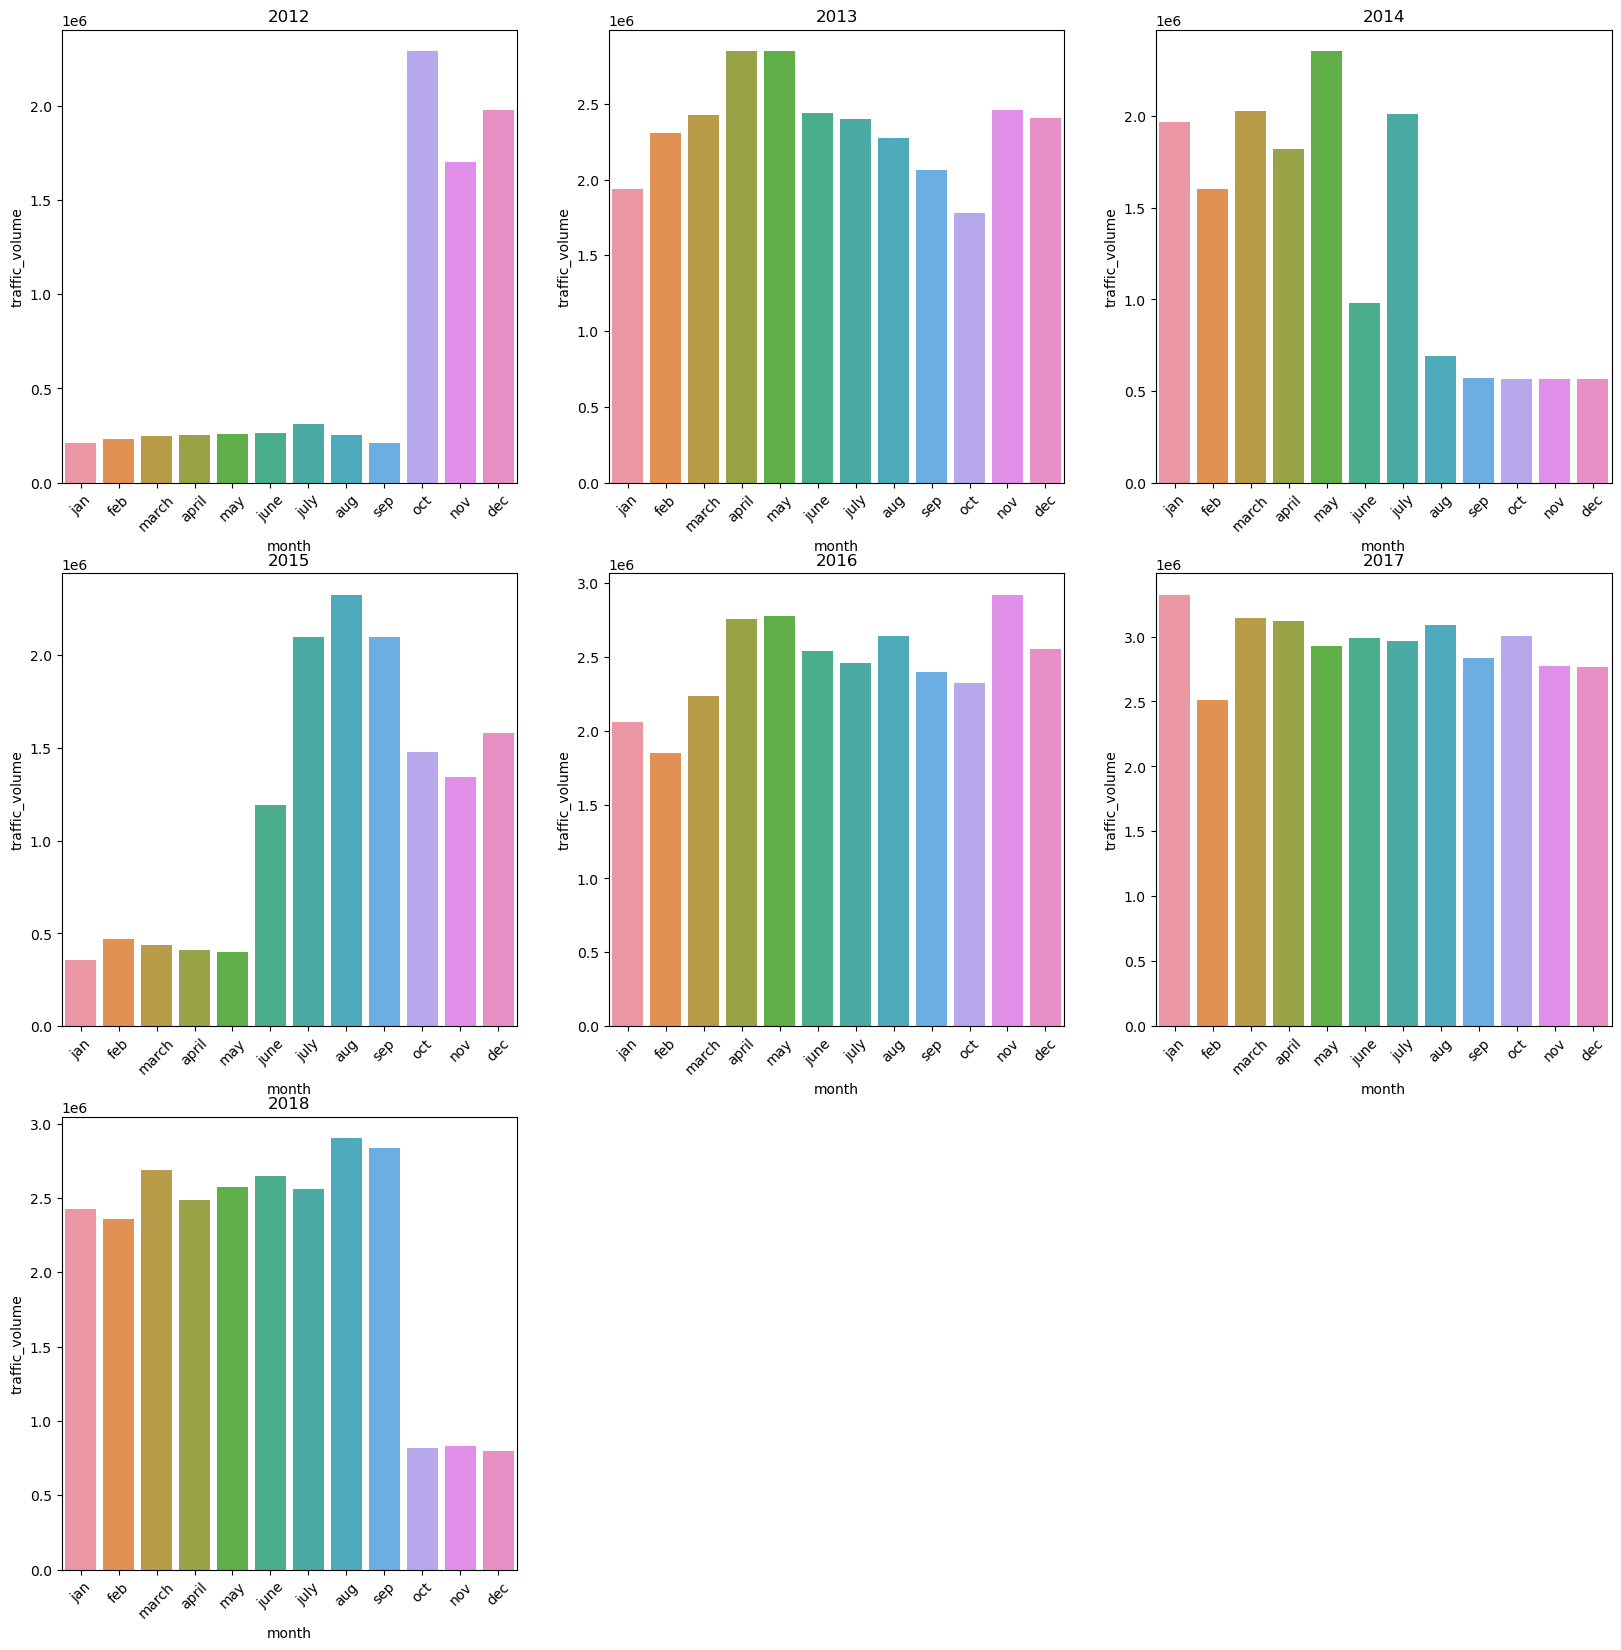

In [21]:
plt.figure(figsize=(20,20))
for i in range(len(year)):
    plt.subplot(3,3,i+1)
    sns.barplot(data[data.year==year[i]].groupby(["month"])["traffic_volume"].sum().reset_index(),x="month",y="traffic_volume")
    plt.xticks(np.arange(12),["jan","feb","march","april","may","june","july","aug","sep","oct","nov","dec"],rotation=45)
    plt.title(year[i])

    

In [22]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour,weekday
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,2,10,9,4
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,2,10,10,4
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,2,10,11,4
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,2,10,12,4
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,2,10,13,4


In [33]:
#data[["year","month","day","hour","traffic_volume"]][data.year==2013][data.month==1].sum()

In [23]:
data[data.rain_1h>0].rain_1h.values

array([0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25])

In [24]:
log_trf_rain=list(np.log(data.rain_1h.values))

/tmp/ipykernel_127/2394237070.py:1: RuntimeWarning: divide by zero encountered in log
  log_trf_rain=list(np.log(data.rain_1h.values))


In [52]:
data["log_rain"]=log_trf_rain

<AxesSubplot: xlabel='log_rain', ylabel='traffic_volume'>

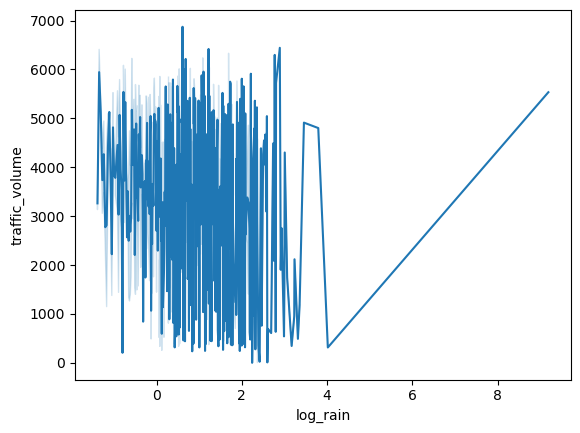

In [55]:
sns.lineplot(data,x="log_rain",y="traffic_volume")

In [ ]:
data["temp"].describe()

count    48204.000000
mean       281.205870
std         13.338232
min          0.000000
25%        272.160000
50%        282.450000
75%        291.806000
max        310.070000
Name: temp, dtype: float64

In [58]:
data.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'traffic_volume', 'year', 'month', 'day', 'hour',
       'weekday', 'log_rain'],
      dtype='object')

In [59]:
data[data.snow_1h>0.0]


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour,weekday,log_rain
20158,None,274.33,0.98,0.51,90,Rain,moderate rain,5167,2015,12,23,12,2,-0.020203
20159,None,274.33,0.98,0.51,90,Snow,snow,5167,2015,12,23,12,2,-0.020203
20160,None,274.33,0.98,0.51,90,Mist,mist,5167,2015,12,23,12,2,-0.020203
20161,None,274.33,0.98,0.51,90,Fog,fog,5167,2015,12,23,12,2,-0.020203
20162,None,273.74,0.00,0.32,90,Snow,light snow,5182,2015,12,23,14,2,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20494,None,273.22,0.00,0.08,90,Mist,mist,401,2016,8,1,3,0,-inf
20507,None,273.80,0.00,0.25,90,Snow,light snow,4933,2016,8,1,13,0,-inf
20508,None,273.80,0.00,0.25,90,Mist,mist,4933,2016,8,1,13,0,-inf
20509,None,273.67,0.00,0.13,90,Snow,light snow,5548,2016,8,1,15,0,-inf


In [60]:
data.weather_main.value_counts()


Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

In [67]:
data[data.weather_description.str.contains("smoke")]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour,weekday,log_rain
16330,None,290.94,0.38,0.0,75,Smoke,smoke,4307,2015,6,7,13,6,-0.967584
16335,None,291.49,0.00,0.0,92,Smoke,smoke,4888,2015,6,7,14,6,-inf
16339,None,293.22,4.57,0.0,90,Smoke,smoke,5205,2015,6,7,15,6,1.519513
16343,None,294.16,5.59,0.0,1,Smoke,smoke,6006,2015,6,7,16,6,1.720979
16346,None,294.68,0.00,0.0,40,Smoke,smoke,5861,2015,6,7,17,6,-inf
16348,None,294.54,0.00,0.0,75,Smoke,smoke,4264,2015,6,7,18,6,-inf
16350,None,294.02,0.00,0.0,1,Smoke,smoke,3040,2015,6,7,19,6,-inf
16352,None,293.46,0.00,0.0,1,Smoke,smoke,2561,2015,6,7,20,6,-inf
23091,None,290.67,0.00,0.0,90,Smoke,smoke,890,2016,7,5,1,1,-inf
23093,None,288.85,0.00,0.0,40,Smoke,smoke,630,2016,7,5,2,1,-inf


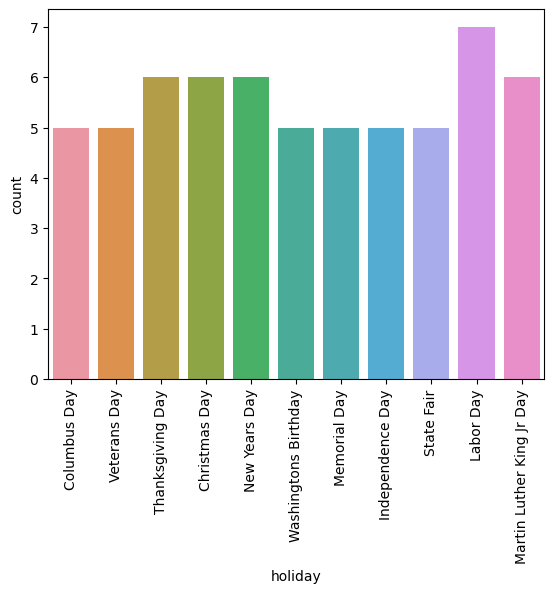

In [ ]:
sns.countplot(data[data.holiday!="None"],x="holiday")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot: xlabel='weather_main', ylabel='count'>

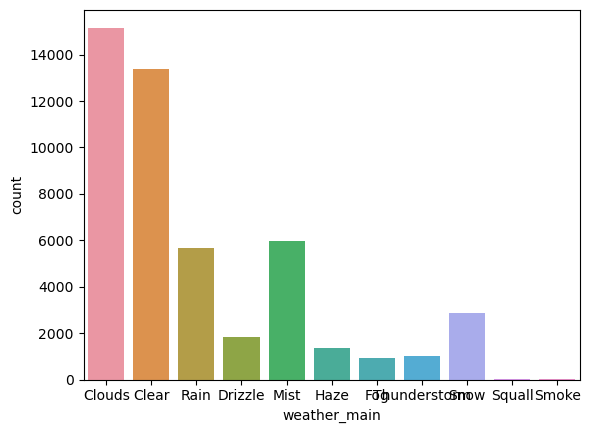

In [ ]:
sns.countplot(data,x="weather_main")

In [ ]:
numdata.columns[data.dtypes!="O"]

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'date_time',
       'traffic_volume', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [ ]:

c=['temp', 'rain_1h', 'snow_1h', 'clouds_all',"traffic_volume"]

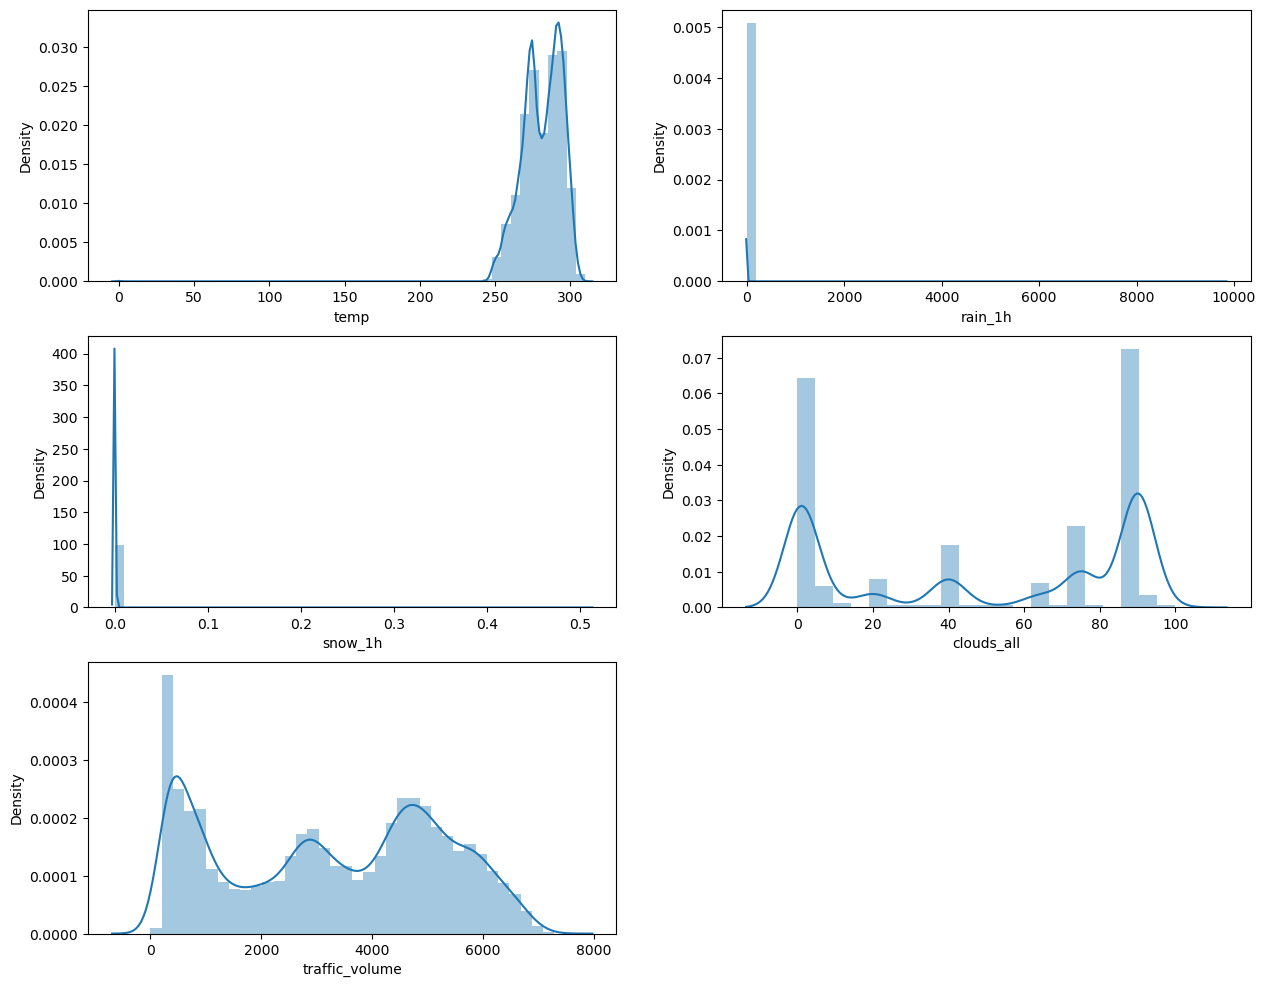

In [ ]:
import warnings
warnings.filterwarnings('ignore')
  
plt.figure(figsize=(15,12))
for i , col in enumerate(c):
    plt.subplot(3,2,i+1)
    sns.distplot(data[col])
    
plt.show()


In [ ]:
cat_cols=data.columns[data.dtypes=="O"]

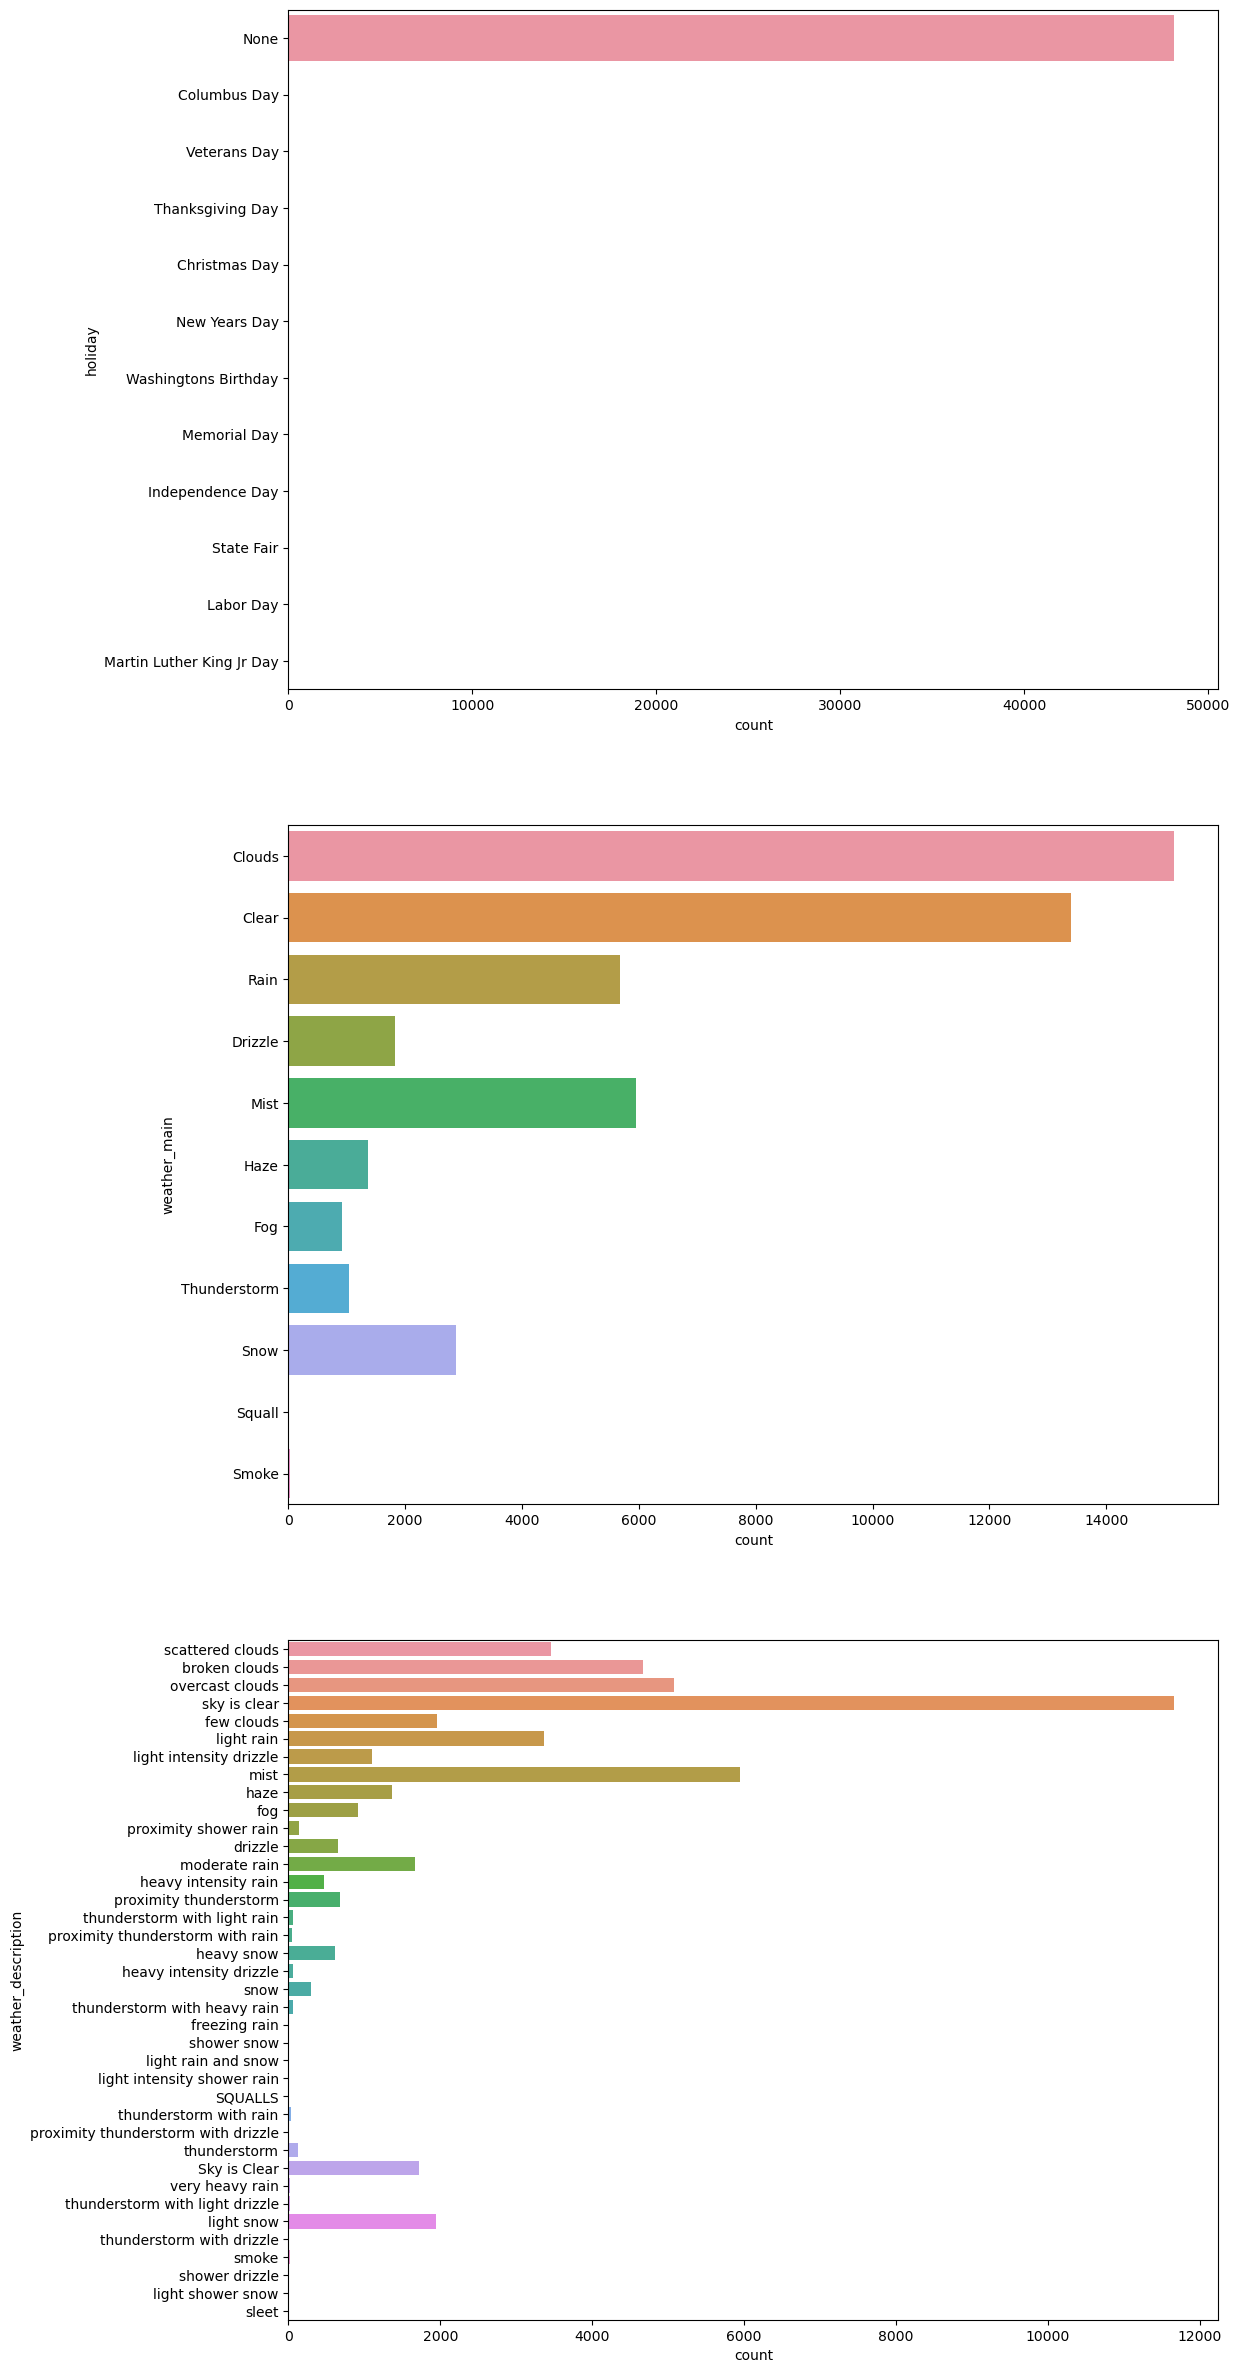

In [ ]:
plt.figure(figsize=(12,30))
for i ,col in enumerate(cat_cols):
    plt.subplot(3,1,i+1)
    sns.countplot(data=data,y=col)
    
plt.show()

In [ ]:
counts=data["weather_main"].value_counts().values
total=counts.sum()
percentages=counts/total
percentages

array([3.14579703e-01, 2.77798523e-01, 1.23433740e-01, 1.17666584e-01,
       5.96630985e-02, 3.77769480e-02, 2.82134263e-02, 2.14505020e-02,
       1.89195917e-02, 4.14903328e-04, 8.29806655e-05])

<AxesSubplot: >

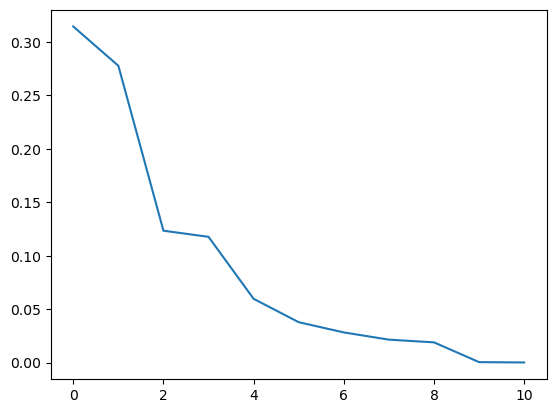

In [ ]:
sns.lineplot(percentages)

In [ ]:
data.weather_main.value_counts(normalize=True)

Clouds          0.314580
Clear           0.277799
Mist            0.123434
Rain            0.117667
Snow            0.059663
Drizzle         0.037777
Haze            0.028213
Thunderstorm    0.021451
Fog             0.018920
Smoke           0.000415
Squall          0.000083
Name: weather_main, dtype: float64

Text(0.5, 1.0, 'dist plot of temp')

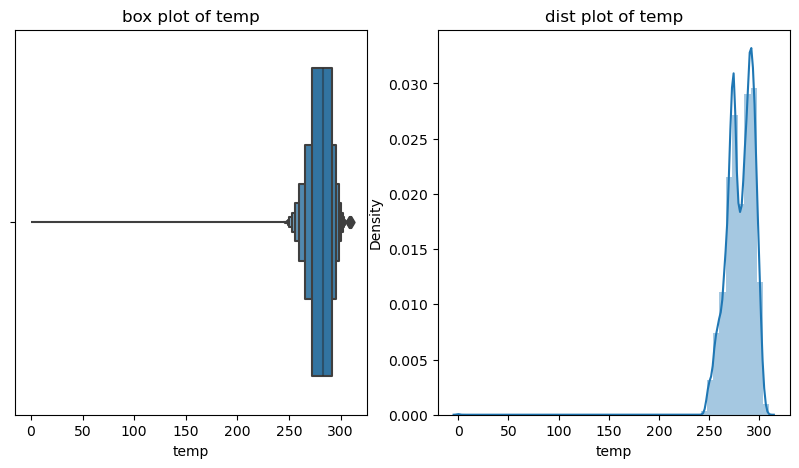

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("box plot of temp")
sns.boxenplot(data=data,x="temp")
plt.subplot(1,2,2)
sns.distplot(data["temp"])
plt.title("dist plot of temp")

<AxesSubplot: xlabel='clouds_all', ylabel='traffic_volume'>

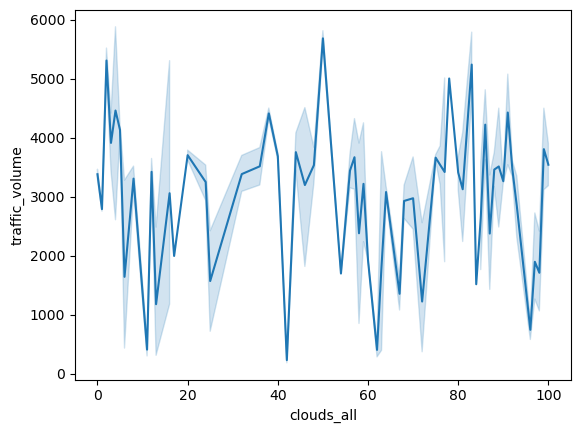

In [57]:
sns.lineplot(data=data,x="clouds_all",y="traffic_volume")

<AxesSubplot: xlabel='weather_main', ylabel='traffic_volume'>

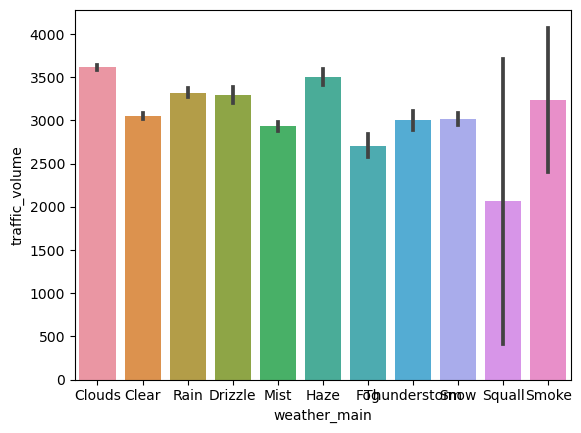

In [ ]:
sns.barplot(data=data,x="weather_main",y="traffic_volume")

In [ ]:
data[["traffic_volume","weather_main"]][data.weather_main=="Clouds"].mean()

traffic_volume    3618.449749
dtype: float64

In [ ]:
data[data.rain_1h>0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour
6688,None,288.86,0.25,0.0,92,Rain,light rain,4423,2013,5,6,10
6689,None,289.11,0.25,0.0,92,Rain,moderate rain,4756,2013,5,6,11
6690,None,289.48,0.25,0.0,92,Rain,light rain,4959,2013,5,6,12
6691,None,289.54,0.25,0.0,92,Rain,light rain,5093,2013,5,6,13
6693,None,289.30,0.25,0.0,92,Rain,light rain,6055,2013,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
48088,None,279.43,0.25,0.0,75,Rain,light rain,6032,2018,9,26,8
48109,None,286.49,0.25,0.0,75,Rain,light rain,3002,2018,9,27,5
48116,None,286.88,0.25,0.0,90,Rain,light rain,4670,2018,9,27,11
48153,None,276.18,0.25,0.0,1,Rain,light rain,1733,2018,9,29,0


In [52]:
data[data.snow_1h>0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour
20158,None,274.33,0.98,0.51,90,Rain,moderate rain,5167,2015,12,23,12
20159,None,274.33,0.98,0.51,90,Snow,snow,5167,2015,12,23,12
20160,None,274.33,0.98,0.51,90,Mist,mist,5167,2015,12,23,12
20161,None,274.33,0.98,0.51,90,Fog,fog,5167,2015,12,23,12
20162,None,273.74,0.00,0.32,90,Snow,light snow,5182,2015,12,23,14
...,...,...,...,...,...,...,...,...,...,...,...,...
20494,None,273.22,0.00,0.08,90,Mist,mist,401,2016,8,1,3
20507,None,273.80,0.00,0.25,90,Snow,light snow,4933,2016,8,1,13
20508,None,273.80,0.00,0.25,90,Mist,mist,4933,2016,8,1,13
20509,None,273.67,0.00,0.13,90,Snow,light snow,5548,2016,8,1,15


In [55]:
data[["weather_main","weather_description"]][data.weather_main=="Clouds"].value_counts()

weather_main  weather_description
Clouds        overcast clouds        5081
              broken clouds          4666
              scattered clouds       3461
              few clouds             1956
dtype: int64

In [58]:
data[data.weather_main=="Clouds"]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,day,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,2,10,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,2,10,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,2,10,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,2,10,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,2,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...
48197,None,284.79,0.0,0.0,75,Clouds,broken clouds,4132,2018,9,30,17
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,3543,2018,9,30,19
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2781,2018,9,30,20
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,1450,2018,9,30,22


In [70]:
data.weather_main.value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

<AxesSubplot: xlabel='weather_description', ylabel='traffic_volume'>

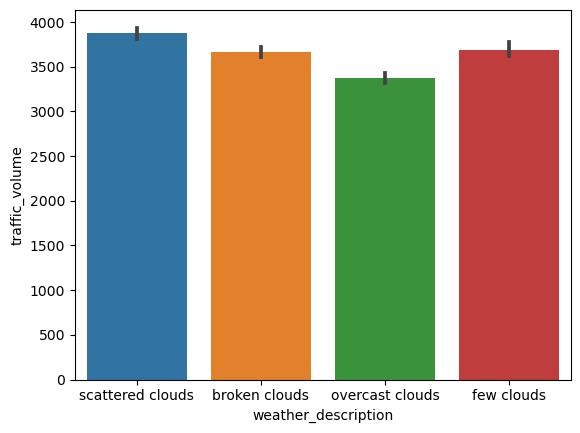

In [69]:
sns.barplot(data[data.weather_main=="Clouds"][["traffic_volume","weather_description"]],x="weather_description",y="traffic_volume")

<AxesSubplot: xlabel='weather_description', ylabel='traffic_volume'>

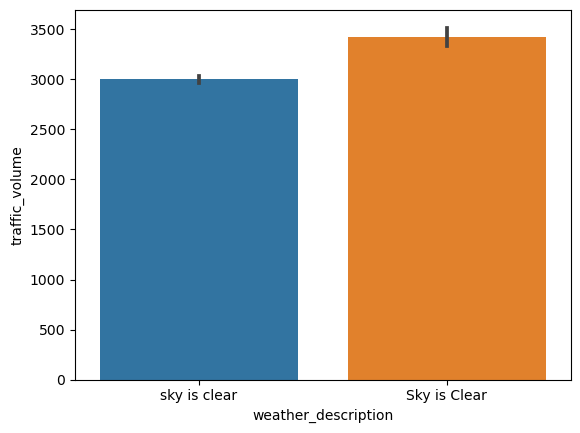

In [72]:
sns.barplot(data[data.weather_main=="Clear"][["traffic_volume","weather_description"]],x="weather_description",y="traffic_volume")

<AxesSubplot: xlabel='weather_description', ylabel='traffic_volume'>

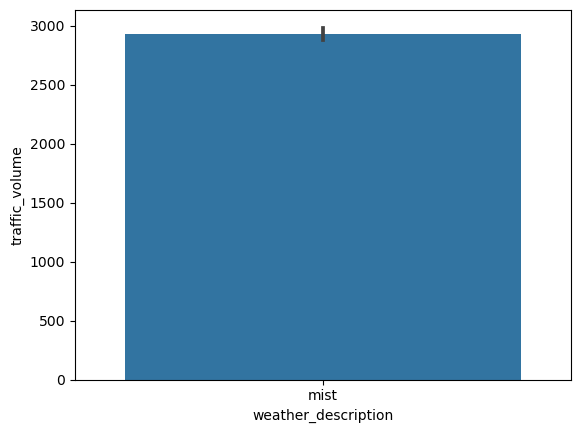

In [73]:
sns.barplot(data[data.weather_main=="Mist"][["traffic_volume","weather_description"]],x="weather_description",y="traffic_volume")

In [74]:
data.weather_description.value_counts()

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'light rain'),
  Text(1, 0, 'proximity shower rain'),
  Text(2, 0, 'moderate rain'),
  Text(3, 0, 'heavy intensity rain'),
  Text(4, 0, 'freezing rain'),
  Text(5, 0, 'light intensity shower rain'),
  Text(6, 0, 'very heavy rain')])

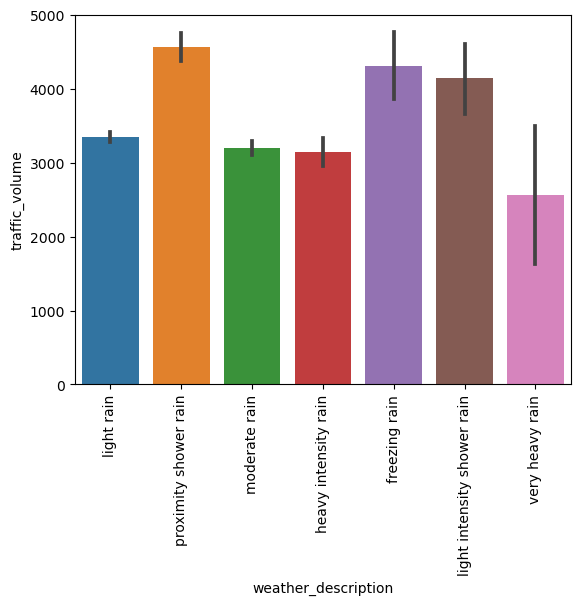

In [77]:
sns.barplot(data[data.weather_main=="Rain"][["traffic_volume","weather_description"]],x="weather_description",y="traffic_volume")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'SNOW')

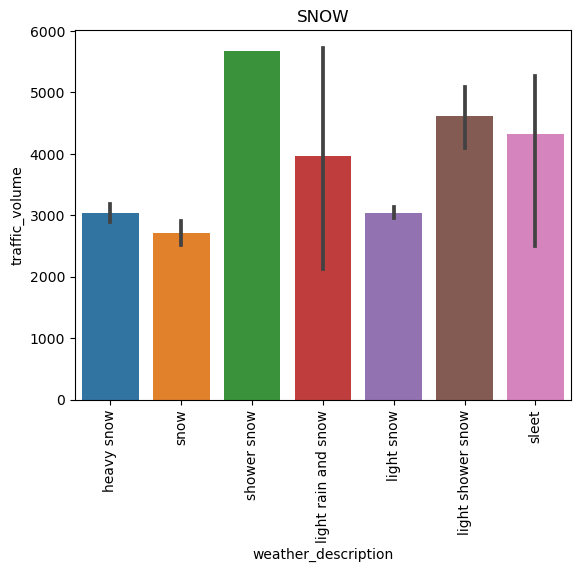

In [81]:
sns.barplot(data[data.weather_main=="Snow"][["traffic_volume","weather_description"]],x="weather_description",y="traffic_volume")
plt.xticks(rotation=90)
plt.title("SNOW")

In [94]:
(data.rain_1h>0).sum()

3467

In [99]:
(data[data.rain_1h>0][["weather_main","weather_description"]]["weather_main"]).value_counts()

Rain            2063
Mist             658
Thunderstorm     324
Drizzle          269
Fog               54
Snow              51
Haze              42
Squall             3
Smoke              3
Name: weather_main, dtype: int64

In [105]:
data[["traffic_volume","hour","clouds_all",'temp']].corr()

,traffic_volume,hour,clouds_all,temp
traffic_volume,1.000000,0.352401,0.067054,0.130299
hour,0.352401,1.000000,0.054418,0.112089
clouds_all,0.067054,0.054418,1.000000,-0.101976
temp,0.130299,0.112089,-0.101976,1.000000
